# Feature Engineering

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

### Definition

![](img_fe.JPG)

In [2]:
from _linear_regression_util import compute_cost, compute_gradient, gradient_descent

iteration: 0 :: w0 = 18.145, b = [1.25]
iteration: 100 :: w0 = 15.640529252177169, b = [-12.42]
iteration: 200 :: w0 = 16.430320968622194, b = [-22.67]
iteration: 300 :: w0 = 17.034437320645782, b = [-30.5]
iteration: 400 :: w0 = 17.49652948897721, b = [-36.5]
iteration: 500 :: w0 = 17.849986519759423, b = [-41.08]
iteration: 600 :: w0 = 18.12034789173528, b = [-44.59]
iteration: 700 :: w0 = 18.327148903147904, b = [-47.27]
iteration: 800 :: w0 = 18.48533221908811, b = [-49.32]
iteration: 900 :: w0 = 18.606327572403444, b = [-50.89]
w final = [18.7], b final = [-52.08]


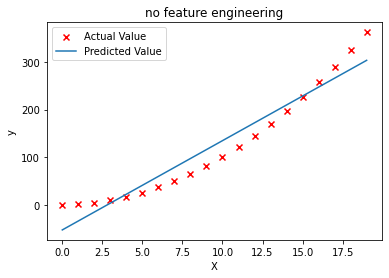

In [3]:
# create target data

x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)  #X should be a 2-D Matrix

w = np.array(0)
b = 0
alpha = 1e-2
iterations = 1000

model_w,model_b,J_hist,w0_hist,b_hist = gradient_descent(X, y, w, b, compute_cost, compute_gradient, alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("no feature engineering")

plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y"); 
plt.legend(); plt.show()

### observations

 - linear regression model prediction does not fits the data well

iteration: 0 :: w0 = 0.28256800000000004, b = [0.]
iteration: 1000 :: w0 = 1.0043505470772724, b = [0.01]
iteration: 2000 :: w0 = 1.0043306736277076, b = [0.01]
iteration: 3000 :: w0 = 1.004310890960748, b = [0.02]
iteration: 4000 :: w0 = 1.0042911986616954, b = [0.02]
iteration: 5000 :: w0 = 1.0042715963177462, b = [0.03]
iteration: 6000 :: w0 = 1.0042520835179825, b = [0.03]
iteration: 7000 :: w0 = 1.0042326598533629, b = [0.04]
iteration: 8000 :: w0 = 1.0042133249167153, b = [0.04]
iteration: 9000 :: w0 = 1.0041940783027274, b = [0.04]
w final = [1.], b final = [0.05]


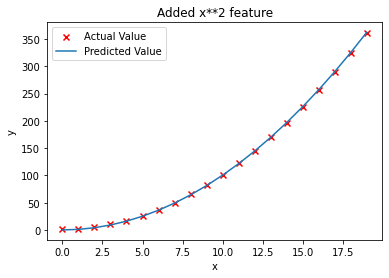

In [4]:
# adding new feature (feature engineering)

# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2 
X = X.reshape(-1, 1)  #X should be a 2-D Matrix

w = np.array(0)
b = 0
alpha = 1e-5
iterations = 10000

model_w,model_b,J_hist,w0_hist,b_hist = gradient_descent(X, y, w, b, compute_cost, compute_gradient, alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Added x**2 feature")

plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); plt.legend(); plt.show()

### observations

 - w0 final ~ 1 and b ~ 0.4, so our model with feature engineering very close to y = x<sup>2</sup> + 1

### selecting features

![](img_fe_sf.JPG)

iteration: 0 :: w0 = 0.0001805, b = 1.2349999999999999e-05
iteration: 1000 :: w0 = 0.011671443975959402, b = 0.001486316056481097
iteration: 2000 :: w0 = 0.02223869835252917, b = 0.0028444779723460004
iteration: 3000 :: w0 = 0.03200039639744685, b = 0.0040987184368103955
iteration: 4000 :: w0 = 0.041017837490379974, b = 0.00525694548278895
iteration: 5000 :: w0 = 0.04934765640629939, b = 0.006326465377759927
iteration: 6000 :: w0 = 0.05704217827073274, b = 0.0073140284153846566
iteration: 7000 :: w0 = 0.06414974650453369, b = 0.008225871222592386
iteration: 8000 :: w0 = 0.07071502581354212, b = 0.009067755847288148
iteration: 9000 :: w0 = 0.07677928212210547, b = 0.009845005871663159
w final = [0.08 0.54 0.03], b final = 0.01056185052956357


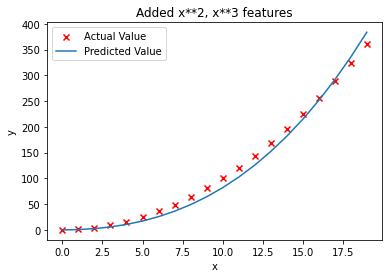

In [5]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

w = np.array([0, 0, 0])
b = 0
alpha = 1e-7
iterations = 10000

model_w,model_b,J_hist,w0_hist,b_hist = gradient_descent(X, y, w, b, compute_cost, compute_gradient, alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Added x**2, x**3 features")

plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

### observations

![](img_fe_obs.JPG)

 - after feature engineering our linear regression model has become polynomial regression
 - but it is to be noted that if we consider x<sup>2</sup> as a completely new feature, our model is linear with respect to this new feature
 - this is illustrated below (in case of x<sup>2</sup> feature,  y vs x<sup>2</sup> plot is linear

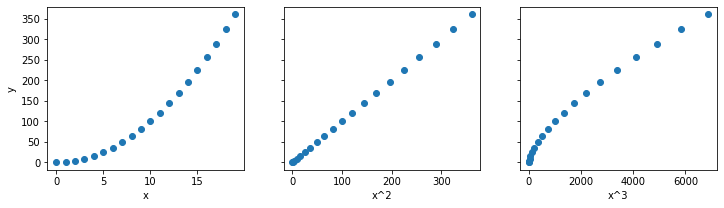

In [6]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

### scaling features

In [7]:
from _linear_regression_util import zscore_normalize_features

In [8]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X,_,_ = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


iteration: 0 :: w0 = 10.955934464937256, b = 12.350000000000001
iteration: 10000 :: w0 = 7.673479953143805, b = 123.49999999999994
iteration: 20000 :: w0 = 2.0476891505133894, b = 123.49999999999994
iteration: 30000 :: w0 = 0.5464314603979857, b = 123.49999999999994
iteration: 40000 :: w0 = 0.14581673240672535, b = 123.49999999999994
iteration: 50000 :: w0 = 0.03891159457467129, b = 123.49999999999994
iteration: 60000 :: w0 = 0.010383665628431972, b = 123.49999999999994
iteration: 70000 :: w0 = 0.00277090962373487, b = 123.49999999999994
iteration: 80000 :: w0 = 0.0007394248253317048, b = 123.49999999999994
iteration: 90000 :: w0 = 0.0001973175405771999, b = 123.49999999999994
w final = [5.27e-05 1.13e+02 8.43e-05], b final = 123.49999999999994


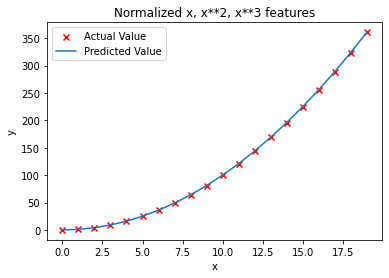

In [9]:
w = np.array([0, 0, 0])
b = 0
alpha = 1e-1
iterations = 100000

model_w,model_b,J_hist,w0_hist,b_hist = gradient_descent(X, y, w, b, compute_cost, compute_gradient, alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Normalized x, x**2, x**3 features")

plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

### observations

 - gradient descent converges much faster after feature scaling (alpha = 10<sup>-1</sup>)
 - gradient descent has effectively eliminated w0 & w2 as and emphasized w1, putting focus on x<sup>2</sup> alone

### complex function training/prediction using feature scaling

In [25]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X,_,_ = zscore_normalize_features(X)

iteration: 0 :: w0 = -0.016511324098692663, b = -0.0007287194855839025
iteration: 10000 :: w0 = -3.2544306817129773, b = -0.007287194855839052
iteration: 20000 :: w0 = -3.823262222976587, b = -0.007287194855839053
iteration: 30000 :: w0 = -4.147300402641646, b = -0.0072871948558390544
iteration: 40000 :: w0 = -4.322400502186027, b = -0.007287194855839142
iteration: 50000 :: w0 = -4.40700332823892, b = -0.007287194855839072
iteration: 60000 :: w0 = -4.436738031003658, b = -0.007287194855839047
iteration: 70000 :: w0 = -4.433324669668566, b = -0.007287194855839126
iteration: 80000 :: w0 = -4.410002452075291, b = -0.007287194855839085
iteration: 90000 :: w0 = -4.374839542793371, b = -0.0072871948558390345
w final = [-4.33e+00  5.90e+00  6.20e+00 -3.32e+00 -7.85e+00 -3.95e+00  6.95e+00
  8.83e-02  5.13e-03  1.94e-02  1.97e-02 -6.81e-02  5.42e-02], b final = -0.007287194855839095


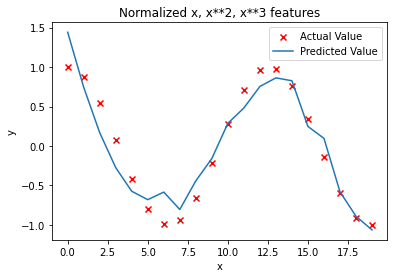

In [26]:
w = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
b = 0
alpha = 1e-1
iterations = 100000

model_w,model_b,J_hist,w0_hist,b_hist = gradient_descent(X, y, w, b, compute_cost, compute_gradient, alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Normalized x, x**2, x**3 features")

plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

### observation

 - with 100,000 iterations the model has already started fitting well to the data
 - if we run with 1,000,000 model will fit just right
 - with feature engineering we now can very complex non linear functions if we add new engineered features correctly